In [1]:
import numpy as np 
import pandas as pd 
import matplotlib as plt
import seaborn as sns 

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv')

In [3]:
df.head()

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score,converted
0,paid_ads,NaN,1,79450.0,unemployed,south_america,4,0.94,1
1,social_media,retail,1,46992.0,employed,south_america,1,0.80,0
2,events,healthcare,5,78796.0,unemployed,australia,3,0.69,1
3,paid_ads,retail,2,83843.0,NaN,australia,1,0.87,0
4,referral,education,3,85012.0,self_employed,europe,3,0.62,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   lead_source               1334 non-null   object 
 1   industry                  1328 non-null   object 
 2   number_of_courses_viewed  1462 non-null   int64  
 3   annual_income             1281 non-null   float64
 4   employment_status         1362 non-null   object 
 5   location                  1399 non-null   object 
 6   interaction_count         1462 non-null   int64  
 7   lead_score                1462 non-null   float64
 8   converted                 1462 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 102.9+ KB


In [5]:
df.isnull().sum()

lead_source                 128
industry                    134
number_of_courses_viewed      0
annual_income               181
employment_status           100
location                     63
interaction_count             0
lead_score                    0
converted                     0
dtype: int64

In [6]:
df.columns

Index(['lead_source', 'industry', 'number_of_courses_viewed', 'annual_income',
       'employment_status', 'location', 'interaction_count', 'lead_score',
       'converted'],
      dtype='object')

In [7]:
df[df.select_dtypes('object').columns] = df.select_dtypes('object').fillna("NA")
df[df.select_dtypes('number').columns] = df.select_dtypes('number').fillna(0)

In [8]:
df.head()

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score,converted
0,paid_ads,NA,1,79450.0,unemployed,south_america,4,0.94,1
1,social_media,retail,1,46992.0,employed,south_america,1,0.80,0
2,events,healthcare,5,78796.0,unemployed,australia,3,0.69,1
3,paid_ads,retail,2,83843.0,NA,australia,1,0.87,0
4,referral,education,3,85012.0,self_employed,europe,3,0.62,1


In [9]:
df.industry.mode()[0]

'retail'

In [10]:
df.industry.value_counts()

industry
retail           203
finance          200
other            198
healthcare       187
education        187
technology       179
manufacturing    174
NA               134
Name: count, dtype: int64

In [11]:
numerical_col = df.select_dtypes('number').columns

In [12]:
correlation_matrix = df.corr(numeric_only= True)
correlation_matrix

,number_of_courses_viewed,annual_income,interaction_count,lead_score,converted
number_of_courses_viewed,1.000000,0.009770,-0.023565,-0.004879,0.435914
annual_income,0.009770,1.000000,0.027036,0.015610,0.053131
interaction_count,-0.023565,0.027036,1.000000,0.009888,0.374573
lead_score,-0.004879,0.015610,0.009888,1.000000,0.193673
converted,0.435914,0.053131,0.374573,0.193673,1.000000


In [13]:
correlation_df = df[['interaction_count', 'lead_score', 'number_of_courses_viewed', 'annual_income']]
correlation_matrix = correlation_df.corr(numeric_only= True)
correlation_matrix

,interaction_count,lead_score,number_of_courses_viewed,annual_income
interaction_count,1.000000,0.009888,-0.023565,0.027036
lead_score,0.009888,1.000000,-0.004879,0.015610
number_of_courses_viewed,-0.023565,-0.004879,1.000000,0.009770
annual_income,0.027036,0.015610,0.009770,1.000000


AttributeError: module 'matplotlib' has no attribute 'title'

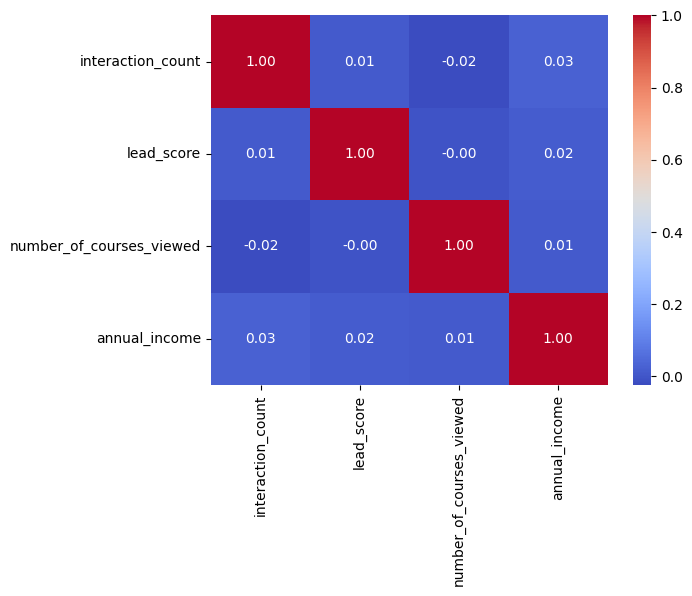

In [14]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
y = df.converted
df.drop('converted', axis =1 , inplace = True)

In [17]:
df.columns

Index(['lead_source', 'industry', 'number_of_courses_viewed', 'annual_income',
       'employment_status', 'location', 'interaction_count', 'lead_score'],
      dtype='object')

In [18]:
'''# First split: 80% for training/validation, 20% for testing, predection
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
y_full, y_test = train_test_split(y, test_size=0.20, random_state=42)

# Second split: The 80% is split into 60% train and 20% validation,predection
train_df, val_df = train_test_split(df_full_train, test_size=0.25, random_state=42)
y_train, y_val = train_test_split(y_full, test_size=0.25, random_state=42)'''

'# First split: 80% for training/validation, 20% for testing, predection\ndf_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)\ny_full, y_test = train_test_split(y, test_size=0.20, random_state=42)\n\n# Second split: The 80% is split into 60% train and 20% validation,predection\ntrain_df, val_df = train_test_split(df_full_train, test_size=0.25, random_state=42)\ny_train, y_val = train_test_split(y_full, test_size=0.25, random_state=42)'

In [19]:
X_full_train, df_test, y_full_train, y_test = train_test_split(df, y, test_size=0.2, random_state=42)

# Second split (the 80% into 60% train and 20% validation)
train_df, val_df, y_train, y_val = train_test_split(X_full_train, y_full_train, test_size=0.25, random_state=42)

In [20]:
len(df), len(train_df), len(df_test), len(val_df), len(train_df+ df_test+ val_df)

(1462, 876, 293, 293, 1462)

In [21]:
len(y), len(y_train), len(y_test), len(y_val), len(y_train+ y_test+ y_val)

(1462, 876, 293, 293, 1462)

In [22]:
y.shape

(1462,)

In [23]:
from sklearn.metrics import mutual_info_score

In [24]:
correlation_col = train_df.select_dtypes('object').columns

In [25]:
# q3: the biggest mutual information score
for col in correlation_col:
    score = mutual_info_score(train_df[col], y_train)
    score = round(score, 2)

    print(f"{col}':'{score}")

lead_source':'0.04
industry':'0.01
employment_status':'0.01
location':'0.0


# Q4

In [26]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [27]:
dv = DictVectorizer(sparse=False)

In [28]:
train_dict = train_df.to_dict(orient='records')
val_dict = val_df.to_dict(orient= 'records')

In [29]:
train_dict[0]

{'lead_source': 'paid_ads',
 'industry': 'retail',
 'number_of_courses_viewed': 0,
 'annual_income': 58472.0,
 'employment_status': 'student',
 'location': 'middle_east',
 'interaction_count': 5,
 'lead_score': 0.03}

In [30]:
X_train = dv.fit_transform(train_dict)
X_val = dv.transform(val_dict)

In [31]:
dv.get_feature_names_out()

array(['annual_income', 'employment_status=NA',
       'employment_status=employed', 'employment_status=self_employed',
       'employment_status=student', 'employment_status=unemployed',
       'industry=NA', 'industry=education', 'industry=finance',
       'industry=healthcare', 'industry=manufacturing', 'industry=other',
       'industry=retail', 'industry=technology', 'interaction_count',
       'lead_score', 'lead_source=NA', 'lead_source=events',
       'lead_source=organic_search', 'lead_source=paid_ads',
       'lead_source=referral', 'lead_source=social_media', 'location=NA',
       'location=africa', 'location=asia', 'location=australia',
       'location=europe', 'location=middle_east',
       'location=north_america', 'location=south_america',
       'number_of_courses_viewed'], dtype=object)

In [32]:
X_train.shape

(876, 31)

In [33]:
val_dict = val_df.to_dict(orient='records')
val_dict[0]

{'lead_source': 'paid_ads',
 'industry': 'healthcare',
 'number_of_courses_viewed': 3,
 'annual_income': 52220.0,
 'employment_status': 'unemployed',
 'location': 'europe',
 'interaction_count': 1,
 'lead_score': 0.07}

In [34]:
model = LogisticRegression(solver = 'liblinear', C=1.0, max_iter=1000, random_state = 42)

In [35]:
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'liblinear'
,max_iter,1000
,multi_class,'deprecated'


In [36]:
y_pred = model.predict(X_val)

In [37]:
# accuracy 
accuracy = accuracy_score(y_val, y_pred)
accuracy

0.6996587030716723

In [38]:
accuracy = round(accuracy, 2)
accuracy

0.7

# Q5

In [39]:
y_pred_baseline = model.predict(X_val)
baseline_accuracy = accuracy_score(y_val, y_pred_baseline)
baseline_accuracy

0.6996587030716723

In [ ]:
features_to_test = ['industry', 'employment_status', 'lead_score']
accuracy_diffs = {}

In [ ]:
for fetaure in features_to_test: 
    df_train_temp = train_df.drop(columns=[fetaure])
    df_val_temp = val_df.drop(columns=[fetaure])

    train_dict_temp = df_train_temp.to_dict(orient='records')
    val_dict_temp = df_val_temp.to_dict(orient='records')

    dv_temp = DictVectorizer(sparse=False)
    X_train_temp = dv_temp.fit_transform(train_dict_temp)
    X_val_temp = dv_temp.transform(val_dict_temp)

    model_temp = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
    model_temp.fit(X_train_temp, y_train)

    y_pred_temp = model_temp.predict(X_val_temp)
    new_accuracy = accuracy_score(y_val, y_pred_temp)

    difference = baseline_accuracy - new_accuracy
    accuracy_diffs[fetaure] = difference

    print(fetaure," ", new_accuracy," ", difference)


industry   0.6996587030716723   0.0
employment_status   0.6962457337883959   0.0034129692832763903
lead_score   0.7064846416382252   -0.0068259385665528916


In [ ]:
least_useful_feature = min(accuracy_diffs, key=lambda f: abs(accuracy_diffs[f]))
least_useful_feature

'industry'

# Q6

In [ ]:
c_values = [0.01, 0.1, 1, 10, 100]

In [ ]:
for c in c_values:
    model = LogisticRegression(solver='liblinear', C=c, max_iter=1000, random_state=42)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)

    print(c, round(accuracy, 3))

0.01 0.7
0.1 0.7
1 0.7
10 0.7
100 0.7
